In [1]:
# import and load modules
%reload_ext autoreload
%autoreload 2
import pprint
import numpy as np; import pandas as pd; import math as math; import copy
from scipy.ndimage import gaussian_filter as gaussian_filter; import scipy.stats as stats
import statsmodels.api as sm; lowess = sm.nonparametric.lowess; from skimage import transform
from loess.loess_1d import loess_1d; import seaborn as sns

#mworks importsc
from mworksbehavior import mwkfiles; from mworksbehavior.imaging import intrinsic as ii; import mworksbehavior as mwb; import mworksbehavior.mwk_io

import matplotlib as mpl; import matplotlib.pyplot as plt; import matplotlib.gridspec as gridspec; from matplotlib import cm; from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable #from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle; from matplotlib.patches import Rectangle

import os, sys; from glob import glob; from pathlib import Path; import pickle
import tifffile as tfl; from datetime import datetime

sys.path.append(Path('src').resolve().as_posix()); 
import quietcell_select_fxns_all as qcsf
import compareQuiet as cQ

#local files and shorthand notations for assigning common functions to variable names
r_ = np.r_; a_ = np.asarray

In [561]:
# Paths
file_path_root = '/Users/phillipscm/data-local/quiet-cell-data'
dir_i5273 = os.path.join(file_path_root,'i5273')
dir_pre_i5273 = os.path.join(dir_i5273,'npys-pre/')
dir_post_i5273 = os.path.join(dir_i5273,'npys-post/')

dir_i5214 = os.path.join(file_path_root,'i5214')
dir_pre_i5214 = os.path.join(dir_i5214,'npys-pre/')
dir_post_i5214 = os.path.join(dir_i5214,'npys-post/')

dir_i5309 = os.path.join(file_path_root,'i5309')
dir_pre_i5309 = os.path.join(dir_i5309,'npys-pre/')
dir_post_i5309 = os.path.join(dir_i5309,'npys-post/')

file_path_save = os.path.join('/Users/phillipscm/data-local/Cortical Learning Figures/')
if not os.path.exists(file_path_save):
    os.makedirs(file_path_save, exist_ok=True)

In [562]:
pre_arrs_i5273 = cQ.load_npys(os.path.join(dir_pre_i5273))
post_arrs_i5273 = cQ.load_npys(os.path.join(dir_post_i5273))

pre_arrs_i5214 = cQ.load_npys(os.path.join(dir_pre_i5214))
post_arrs_i5214 = cQ.load_npys(os.path.join(dir_post_i5214))

pre_arrs_i5309 = cQ.load_npys(os.path.join(dir_pre_i5309))
post_arrs_i5309 = cQ.load_npys(os.path.join(dir_post_i5309))


print(pre_arrs_i5273.keys(),'\n', pre_arrs_i5214.keys(),'\n','\n',pre_arrs_i5309.keys())


dict_keys(['dfoF2P_cell_pre_lseg', 'avgTrial2P_pre', 'avgTrialV_pre', 'dFoF_map_maskV_pre_lseg', 'trial_ftrace_pre_lseg', 'visResp_notStim_pre', 'trial_dfoFsmooth2P_pre', 'trial_dfoFsmoothV_pre', 'visResp_ctrl35um_pre', 'dfoFV_cell_pre_lseg', 'visResp_nearManip_pre', 'visResp_alliC_pre', 'dfV_cell_pre_lseg', 'dFoF_map_mask2P_pre_lseg', 'visResp_behavStim_pre', 'dFoF_map_cell_masksV_pre_lseg', 'avgTrial_cell_pre_lseg', 'dFoF_map_cell_masks2P_pre_lseg', 'trial_dfoFtrace_pre_lseg', 'avgPrestim2P_pre', 'df2P_cell_pre_lseg', 'avgPrestimV_pre', 'twoPResp_manip_pre', 'df_V_pre', 'df_2P_pre', 'twoPResp_ctrl35um_pre']) 
 dict_keys(['dfoF2P_cell_pre_lseg', 'avgTrial2P_pre', 'avgTrialV_pre', 'dFoF_map_maskV_pre_lseg', 'trial_ftrace_pre_lseg', 'visResp_notStim_pre', 'trial_dfoFsmooth2P_pre', 'trial_dfoFsmoothV_pre', 'visResp_ctrl35um_pre', 'dfoFV_cell_pre_lseg', 'visResp_nearManip_pre', 'visResp_alliC_pre', 'dfV_cell_pre_lseg', 'dFoF_map_mask2P_pre_lseg', 'visResp_behavStim_pre', 'dFoF_map_cell_ma

In [563]:
visResp_behavStim_pre = np.concatenate((pre_arrs_i5273['visResp_behavStim_pre'],pre_arrs_i5214['visResp_behavStim_pre'],pre_arrs_i5309['visResp_behavStim_pre']))
visResp_notStim_pre = np.concatenate((pre_arrs_i5273['visResp_ctrl35um_pre'],pre_arrs_i5214['visResp_ctrl35um_pre'],pre_arrs_i5309['visResp_ctrl35um_pre']))
visResp_nearManip_pre = np.concatenate((pre_arrs_i5273['visResp_nearManip_pre'],pre_arrs_i5214['visResp_nearManip_pre'],pre_arrs_i5309['visResp_nearManip_pre']))
visResp_alliC_pre = np.concatenate((pre_arrs_i5273['visResp_alliC_pre'],pre_arrs_i5214['visResp_alliC_pre'],pre_arrs_i5309['visResp_alliC_pre']))

visResp_behavStim_post = np.concatenate((post_arrs_i5273['visResp_behavStim_post'],post_arrs_i5214['visResp_behavStim_post'],post_arrs_i5309['visResp_behavStim_post']))
visResp_notStim_post = np.concatenate((post_arrs_i5273['visResp_ctrl35um_post'],post_arrs_i5214['visResp_ctrl35um_post'],post_arrs_i5309['visResp_ctrl35um_post']))
visResp_nearManip_post = np.concatenate((post_arrs_i5273['visResp_nearManip_post'],post_arrs_i5214['visResp_nearManip_post'],post_arrs_i5309['visResp_nearManip_post']))
visResp_alliC_post = np.concatenate((post_arrs_i5273['visResp_alliC_post'],post_arrs_i5214['visResp_alliC_post'],post_arrs_i5309['visResp_alliC_post']))


In [564]:
## Creating fake data for behavioral mag + correlation 

# Intialize data 
cell_resp = visResp_behavStim_pre[:,3]
behave_data = np.empty([cell_resp.shape[0],6])

# Fake multiplier data
mags = [17, 12, 8, 7, 5]
print("shape of behave template = " + str(behave_data.shape))
print("cell_resp = " + str(cell_resp.shape))

i = 0
behave_data[:,0] = cell_resp # Making intital vector the pre-day
for mag in mags: 
    shift = np.random.rand(cell_resp.shape[0])
    behave_data[:,i+1] = mag*cell_resp*(1 - shift)
    i = i+1

# Checking that behave data is diff
print("Does data match?: " + str((behave_data[:,4]==cell_resp).all()))

shape of behave template = (52, 6)
cell_resp = (52,)
Does data match?: False


In [565]:
## Compare cell response magnitudes across days
# Initialize vars 
#cell_diff = np.empty(behave_data.shape)
#mean_diff = np.empty(behave_data.shape[1])
#percent_change = np.empty(behave_data.shape[1])
#correlation = np.empty(behave_data.shape[1])
#sem_normalize = np.empty(behave_data.shape[1])
#normalize = np.empty(behave_data.shape[1])
#cell_normalize = np.empty(behave_data.shape)
#percent_diff_to_first = np.zeros_like(behave_data)
diff_to_first = np.empty(behave_data.shape[1])
sem_diff = np.empty(behave_data.shape[1])
cell_diff_to_first = np.zeros_like(behave_data)

for col in range(0,behave_data.shape[1]):
    #cell_diff[:,col] = behave_data[:,col] - cell_resp
    #mean_diff[col] = abs(np.mean(behave_data[:,col]) - np.mean(cell_resp))/(np.mean(behave_data[:,col]) + np.mean(cell_resp))/2*100 # NEED TO MAKE MEAN SPECIFIC TO ANIMALS WILL DO THIS LATER 
    #percent_change[col] = np.mean(behave_data[:,col]) - np.mean(cell_resp)/abs(np.mean(cell_resp))*100
    #normalize[col] = np.mean(behave_data[:,col]/cell_resp)
    #sem_normalize[col] = stats.sem(behave_data[:,col]/cell_resp)
    #cell_normalize[:,col] = behave_data[:,col]/cell_resp
    #correlation[col] = np.corrcoef(cell_resp,behave_data[:,col])[1,0]
    diff_to_first[col] = np.mean((behave_data[:, col] - behave_data[:, 0])/cell_resp)
    sem_diff[col] = stats.sem((behave_data[:, col] - behave_data[:, 0])/cell_resp)
    cell_diff_to_first[:,col] = (behave_data[:, col] - behave_data[:, 0])/cell_resp

    #percent_diff_to_first[:, col] = ((behave_data[:, col] - behave_data[:, 0]) / behave_data[:, 0]) * 100

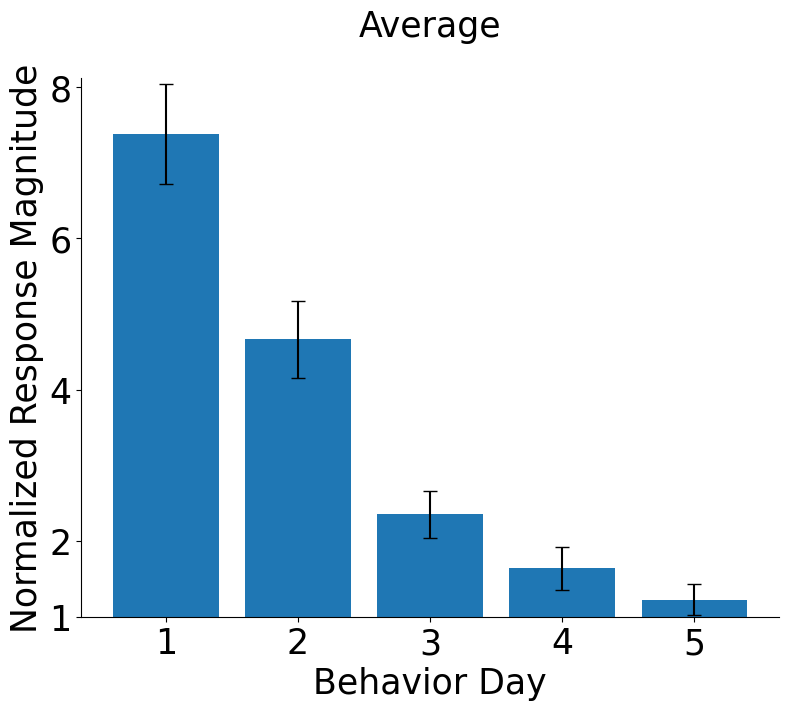

In [631]:
## Creating Plot for Magnitude Difference Across Days
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)
days = range(1,6)
# Calculating the max of the mean values to normalize against
#norm = max(mean_diff)
#сmар = matplotlib.pyplot.get_cmap('RdBu', np.max(ex_stim) -np.min(ex_stim)+1)
# set limits .5 outside true range
bars = ax1.bar(days,diff_to_first[1:])
error = ax1.errorbar(days,diff_to_first[1:],sem_diff[1:],color = "black", fmt = 'None', capsize = 5)
#tell the colorbar to tick at integers
font = {'size'   : 25}
mpl.rc('font', **font)
ax1. set(ylim=[1,max(diff_to_first)*1.1])
ax1.set_ylabel("Normalized Response Magnitude")
yticks = np.linspace(1,8,5)
ax1.set_yticks([1,2,4,6,8])
ax1.set_xlabel("Behavior Day")
ax1.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax1.set_title("Average",fontsize = 25)
ax1.spines[['right', 'top']].set_visible(False)
ax1.axhline(0)
plt.savefig(file_path_save+'Average Norm Mag Diff.png',bbox_inches='tight',dpi=400)
#plt.savefig(file_path_save+'Average Norm Mag Diff.svg',bbox_inches='tight',dpi=75)
plt.show()

In [571]:
file_path_save

'/Users/phillipscm/data-local/Cortical Learning Figures/'

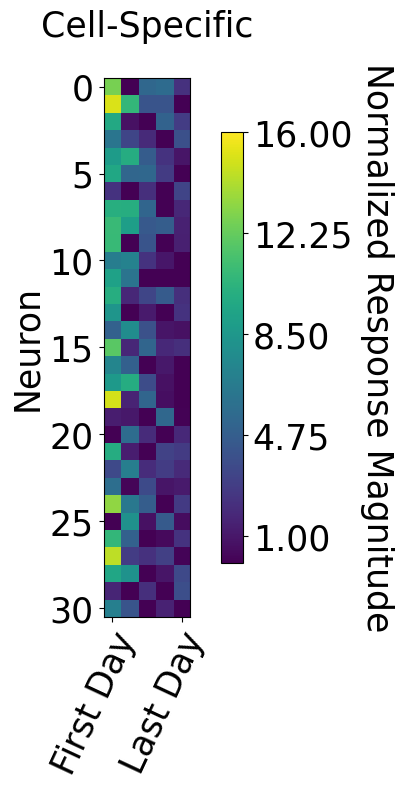

In [629]:
# Creating Plot for Magnitude Difference for All Cells
fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111)
labelfont = 25
# Set limits for the color bar
cbar_min = 1
cbar_max = np.ceil(np.max(cell_diff_to_first[0:30,1:]))  # Round up to the nearest integer
# Create the matrix plot
mat = ax1.matshow(cell_diff_to_first[0:31,1:], cmap=plt.cm.viridis, vmin = 0, vmax = cbar_max)

# Create the color bar and set its ticks to round numbers
cbar = fig.colorbar(mat, shrink=0.8)
cbar.set_label(
    u'Normalized Response Magnitude',  # Label text
    rotation=270,
    fontsize=labelfont,
    labelpad=30,  # Increase distance from ticks
)
cbar_ticks = np.linspace(cbar_min, cbar_max, num=5)
cbar.set_ticks(cbar_ticks)

# Update font size for color bar tick labels
cbar.ax.tick_params(labelsize=labelfont)

# Label axes and customize ticks
ax1.set_ylabel("Neuron", fontsize = labelfont)
#ax1.set_xlabel("Behavior Day", fontsize = labelfont)
ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels(["First Day\n", "", "", "", "Last Day\n"], fontsize = labelfont,)
ax1.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
tick_labels = ax1.get_yticklabels()
for label in tick_labels[1:]:  # Remaining tick labels vertical
    label.set_fontsize(labelfont)

# Customize x-axis tick label rotation: first label horizontal, others vertical
tick_labels = ax1.get_xticklabels()
#tick_labels[0].set_rotation(35)  # First tick label horizontal
for label in tick_labels:  # Remaining tick labels vertical
    label.set_rotation(65)

# Title for the plot
#ax1.set_title("Opto + Stim Response Norm. to Pre-vis", fontsize=15)
ax1.set_title("Cell-Specific", fontsize =25)
plt.rcParams['axes.titlepad'] = 30
#plt.savefig(file_path_save+'Cell Norm Mag.svg',bbox_inches='tight',dpi=72)

# Get current ticks
current_ticks = ax1.get_xticks()

# Remove specific ticks (e.g., 2 and 6)
ticks_to_show = [tick for tick in current_ticks if tick not in [1,2,3]]

# Update the x-axis ticks
ax1.set_xticks(ticks_to_show)

plt.savefig(file_path_save+'Cell Norm Mag Diff.png',bbox_inches='tight',dpi=400)


# Display the plot
plt.show()

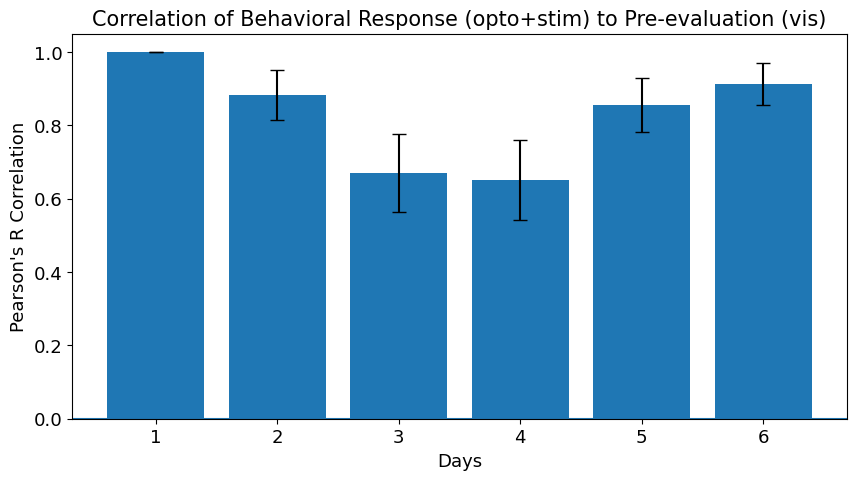

In [569]:
## Creating Plot for Correlation Across Days 
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
days = range(1,7)

correlation_error = np.array((1-correlation**2)/(np.array(cell_resp.shape)-3))**(1/2)

# set limits .5 outside true range
bars = ax1.bar(days,correlation)
error = ax1.errorbar(days,correlation,correlation_error,color = "black", fmt = 'None', capsize = 5)
#tell the colorbar to tick at integers
ax1.font = {'size'   : 15}
mpl.rc('font', **font)
ax1.set_ylabel("Pearson's R Correlation")
ax1.set_xlabel("Days")
ax1.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax1.set_title("Correlation of Behavioral Response (opto+stim) to Pre-evaluation (vis)",fontsize = 15)
ax1.axhline(0)
#plt.text(5,50, "stim", horizontalalignment = "right",)